# Import all required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

# Read data from csv file

In [2]:
rawData = pd.read_csv("../Data/CustomerChurnData/data.csv")
rawData.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Check if there any null value or not

In [3]:
rawData.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### No nulll values at all

# Check the data types of all columns

In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Everything is fine but TotalCharge column should have float data type
## Also check other column data type to ensure it's datatype

In [5]:
def PrintUniqueValues():
    print("MultipleLines:",rawData.MultipleLines.unique())
    print("InternetService:",rawData.InternetService.unique())
    print("OnlineSecurity:",rawData.OnlineSecurity.unique())
    print("OnlineBackup:",rawData.OnlineBackup.unique())
    print("DeviceProtection:",rawData.DeviceProtection.unique())
    print("TechSupport:",rawData.TechSupport.unique())
    print("StreamingTV:",rawData.StreamingTV.unique())
    print("StreamingMovies:",rawData.StreamingMovies.unique())
    print("Contract:",rawData.Contract.unique())
    print("PaperlessBilling:",rawData.PaperlessBilling.unique())
    print("PaymentMethod:",rawData.PaymentMethod.unique())
PrintUniqueValues()

MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


# Change the data type of TotalCharge column
## But there is some empty values which can't be convert into float
## remove those data points first

In [6]:
rawData.drop(rawData[rawData.TotalCharges == " "].index,inplace=True)
rawData = rawData.astype({"TotalCharges":float})
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## now TotalCharge column has float datatype

# We have previously saw that some of columns have thre different values -> Yes,No,No Internet Service
## we replace No Internet Service with No in all columns

In [7]:
rawData.MultipleLines.where(rawData.MultipleLines != "No phone service","No",inplace=True)
rawData.OnlineBackup.where(rawData.OnlineBackup != "No internet service","No",inplace=True)
rawData.OnlineSecurity.where(rawData.OnlineSecurity != "No internet service","No",inplace=True)
rawData.DeviceProtection.where(rawData.DeviceProtection != "No internet service","No",inplace=True)
rawData.TechSupport.where(rawData.TechSupport != "No internet service","No",inplace=True)
rawData.StreamingTV.where(rawData.StreamingTV != "No internet service","No",inplace=True)
rawData.StreamingMovies.where(rawData.StreamingMovies != "No internet service","No",inplace=True)
PrintUniqueValues()

MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


# Now check the distribution of dataset

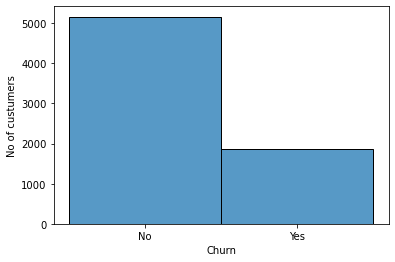

In [8]:
#print("Churn:",(rawData.Churn == 'Yes').sum())
#print("Not Churn:",(rawData.Churn == 'No').sum())
sb.histplot(rawData.Churn,stat="count",ax=plt.axes(ylabel="No of custumers"))

# So the data is imbalance

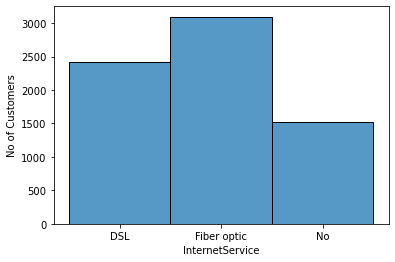

In [9]:
sb.histplot(rawData.InternetService,stat="count",ax=plt.axes(ylabel="No of Customers"))

### Most of the customer have Fiber optic service

# Now analyse why people leave

In [10]:
peopleWhoLeave = rawData[rawData.Churn == "Yes"]
peoleWhoNotLeave = rawData[rawData.Churn == "No"]

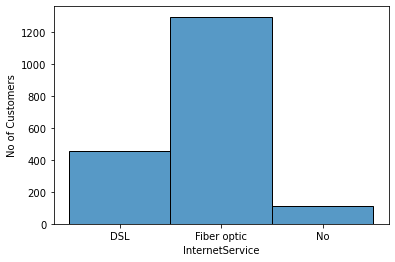

In [11]:
sb.histplot(peopleWhoLeave.InternetService,stat="count",ax=plt.axes(ylabel="No of Customers"))

# So people who have fibre optic internet connectivity leave more

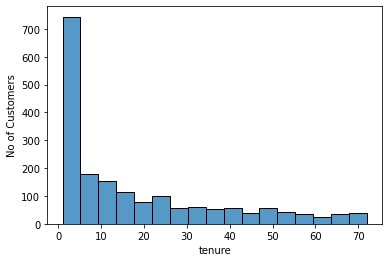

In [12]:
sb.histplot(peopleWhoLeave.tenure,stat="count",ax=plt.axes(ylabel="No of Customers"))

# so people who have short time tenure leave more as compare to people who have long tenure

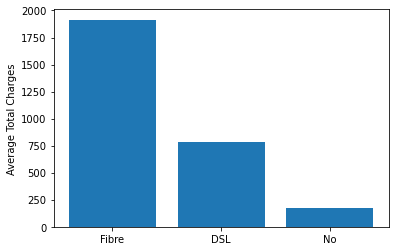

In [13]:
plt.ylabel("Average Total Charges")
plt.bar(x=["Fibre","DSL","No"],height=[peopleWhoLeave[peopleWhoLeave.InternetService == "Fiber optic"].TotalCharges.mean(),
            peopleWhoLeave[peopleWhoLeave.InternetService == "DSL"].TotalCharges.mean(),
            peopleWhoLeave[peopleWhoLeave.InternetService == "No"].TotalCharges.mean()])
plt.show()

# And here is the reason why people have fiber optic connetion leave more
## These customers have more total charges as compare to other 

# Lets check why poeple have short tenure leave more 

In [14]:
shortTenure = peopleWhoLeave[peopleWhoLeave.tenure <= 10]

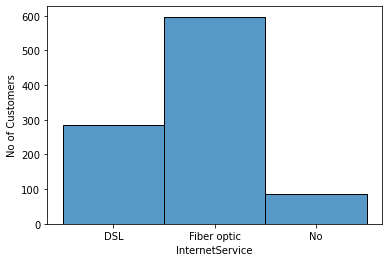

In [15]:
sb.histplot(shortTenure.InternetService,stat="count",ax=plt.axes(ylabel="No of Customers"))

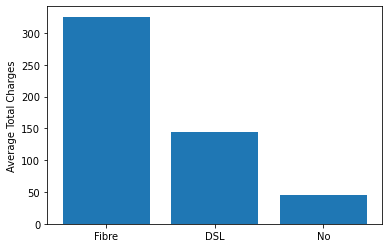

In [16]:
plt.ylabel("Average Total Charges")
plt.bar(x=["Fibre","DSL","No"],height=[shortTenure[shortTenure.InternetService == "Fiber optic"].TotalCharges.mean(),
            shortTenure[shortTenure.InternetService == "DSL"].TotalCharges.mean(),
            shortTenure[shortTenure.InternetService == "No"].TotalCharges.mean()])
plt.show()

# Graphs are quite similar as previous ones

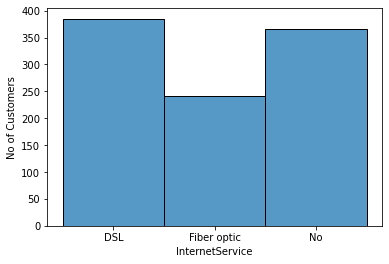

In [17]:
# Also check for peoples who don't leave
shortTenure = peoleWhoNotLeave[peoleWhoNotLeave.tenure <= 10]
#len(shortTenure)
sb.histplot(shortTenure.InternetService,stat="count",ax=plt.axes(ylabel="No of Customers"))

# This is obevous
## Less no of peoples who have Fiber optic are staying

# Lets also check monthly charges

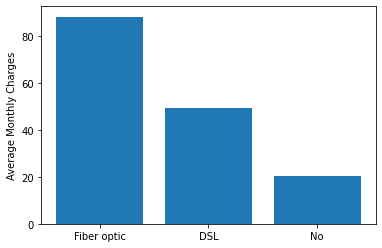

In [18]:

plt.ylabel("Average Monthly Charges")
plt.bar(x=["Fiber optic","DSL",'No'],height=[peopleWhoLeave[peopleWhoLeave.InternetService == "Fiber optic"].MonthlyCharges.mean(),
                    peopleWhoLeave[peopleWhoLeave.InternetService == "DSL"].MonthlyCharges.mean(),
                    peopleWhoLeave[peopleWhoLeave.InternetService == "No"].MonthlyCharges.mean()],
                  )
plt.show()

# here also fiber optic have high monthly charges

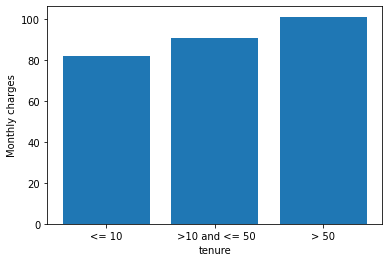

In [19]:
plt.ylabel("Monthly charges")
plt.xlabel("tenure")
plt.bar(x=["<= 10"," >10 and <= 50","> 50"],height =[peopleWhoLeave[(peopleWhoLeave.tenure <= 10) & (peopleWhoLeave.InternetService == "Fiber optic")].MonthlyCharges.mean(),
                     peopleWhoLeave[(peopleWhoLeave.tenure > 10) & (peopleWhoLeave.tenure <= 50) & (peopleWhoLeave.InternetService == "Fiber optic")].MonthlyCharges.mean(),
                     peopleWhoLeave[(peopleWhoLeave.tenure > 50) & (peopleWhoLeave.InternetService == "Fiber optic")].MonthlyCharges.mean()])
plt.show()

### Although people have short tenure having lowest monthley charges but i feel it is compartively high

# Data Preprocessing

In [20]:
PrintUniqueValues()

MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [21]:
processData = rawData.copy()
processData.MultipleLines = rawData.MultipleLines.replace({"No":0,"Yes":1})
processData.OnlineSecurity = rawData.OnlineSecurity.replace({"No":0,"Yes":1})
processData.OnlineBackup = rawData.OnlineBackup.replace({"No":0,"Yes":1})
processData.DeviceProtection = rawData.DeviceProtection.replace({"No":0,"Yes":1})
processData.TechSupport = rawData.TechSupport.replace({"No":0,"Yes":1})
processData.StreamingTV = rawData.StreamingTV.replace({"No":0,"Yes":1})
processData.StreamingMovies = rawData.StreamingMovies.replace({"No":0,"Yes":1})
processData.PaperlessBilling = rawData.PaperlessBilling.replace({"No":0,"Yes":1})
#processData.InternetService = rawData.InternetService.replace({"No":0,"Fiber optic":1,"DSL":2})
processData.gender = rawData.gender.replace({"Female":0,"Male":1})
processData.Partner = rawData.Partner.replace({"No":0,"Yes":1})
processData.Dependents = rawData.Dependents.replace({"No":0,"Yes":1})
processData.PhoneService = rawData.PhoneService.replace({"No":0,"Yes":1})
processData.Churn = rawData.Churn.replace({"No":0,"Yes":1})

In [22]:
processData = pd.concat([processData,pd.get_dummies(processData.InternetService),pd.get_dummies(processData.Contract)],axis=1)

In [23]:
dropcols = ["customerID","PaymentMethod","Contract","InternetService"]
processData.drop(dropcols,axis=1,inplace=True)

In [24]:
processData.MonthlyCharges = processData.MonthlyCharges/max(processData.MonthlyCharges)
processData.TotalCharges = processData.TotalCharges/max(processData.TotalCharges)
processData.tenure = processData.tenure/max(processData.tenure)

In [25]:
processData.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,No,Month-to-month,One year,Two year
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,0.450303,0.903299,0.421928,0.286547,0.344852,0.343857,...,0.592719,0.545669,0.262908,0.265785,0.343572,0.440273,0.216155,0.551052,0.209329,0.239619
std,0.500014,0.368844,0.499729,0.457629,0.340906,0.295571,0.493902,0.452180,0.475354,0.475028,...,0.491363,0.253356,0.261004,0.441782,0.474934,0.496455,0.411650,0.497422,0.406858,0.426881
min,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.153684,0.002165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.125000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.299684,0.046224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.402778,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.592421,0.160910,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.763889,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.756737,0.436940,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
processData.shape

(7032, 23)

In [27]:
X = processData.drop("Churn",axis=1)
Y = processData.Churn

In [28]:
from imblearn.over_sampling import SMOTE

In [34]:
sm = SMOTE()
x_sample,y_sample = sm.fit_resample(X,Y)

In [38]:
from sklearn.model_selection import train_test_split

In [76]:
train_x,test_x,train_y,test_y = train_test_split(x_sample,y_sample,test_size=0.4,random_state=10)

In [77]:
import tensorflow as tf

In [78]:
model = tf.keras.Sequential(
    [
    tf.keras.layers.Dense(15,input_shape=(22,),activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
    ]
)

In [79]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [85]:
model.fit(train_x,train_y,epochs=100)

Epoch 1/100
194/194 [==============================] - 0s 933us/step - loss: 0.4000 - accuracy: 0.8119
Epoch 2/100
194/194 [==============================] - 0s 912us/step - loss: 0.3997 - accuracy: 0.8145
Epoch 3/100
194/194 [==============================] - 0s 923us/step - loss: 0.3979 - accuracy: 0.8178
Epoch 4/100
194/194 [==============================] - 0s 912us/step - loss: 0.3975 - accuracy: 0.8179
Epoch 5/100
194/194 [==============================] - 0s 918us/step - loss: 0.3970 - accuracy: 0.8149
Epoch 6/100
194/194 [==============================] - 0s 928us/step - loss: 0.3975 - accuracy: 0.8182
Epoch 7/100
194/194 [==============================] - 0s 912us/step - loss: 0.3984 - accuracy: 0.8199
Epoch 8/100
194/194 [==============================] - 0s 897us/step - loss: 0.3974 - accuracy: 0.8137
Epoch 9/100
194/194 [==============================] - 0s 912us/step - loss: 0.3966 - accuracy: 0.8205
Epoch 10/100
194/194 [==============================] - 0s 990us/step - l

194/194 [==============================] - 0s 943us/step - loss: 0.3818 - accuracy: 0.8252
Epoch 80/100
194/194 [==============================] - 0s 907us/step - loss: 0.3830 - accuracy: 0.8250
Epoch 81/100
194/194 [==============================] - 0s 902us/step - loss: 0.3840 - accuracy: 0.8221
Epoch 82/100
194/194 [==============================] - 0s 902us/step - loss: 0.3823 - accuracy: 0.8239
Epoch 83/100
194/194 [==============================] - 0s 938us/step - loss: 0.3807 - accuracy: 0.8255
Epoch 84/100
194/194 [==============================] - 0s 990us/step - loss: 0.3839 - accuracy: 0.8257
Epoch 85/100
194/194 [==============================] - 0s 985us/step - loss: 0.3826 - accuracy: 0.8286
Epoch 86/100
194/194 [==============================] - 0s 990us/step - loss: 0.3822 - accuracy: 0.8268
Epoch 87/100
194/194 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8242
Epoch 88/100
194/194 [==============================] - 0s 959us/step - loss: 0

In [91]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [87]:
y_pred = model.predict_classes(test_x)

In [88]:
confusion_matrix(test_y,y_pred)

array([[1574,  459],
       [ 407, 1691]], dtype=int64)

In [89]:
accuracy_score(test_y,y_pred)

0.7903655289276205

In [94]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2033
           1       0.79      0.81      0.80      2098

    accuracy                           0.79      4131
   macro avg       0.79      0.79      0.79      4131
weighted avg       0.79      0.79      0.79      4131



# Got Accuracy of 79%, not bad